In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sandp500/merge.sh
/kaggle/input/sandp500/getSandP.py
/kaggle/input/sandp500/all_stocks_5yr.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FDX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMAT_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GLW_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/ANSS_data.csv
/kaggle/input/sandp500/individual_stock

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [4]:
#Load the S&P 500 stock data

data=pd.read_csv('/kaggle/input/sandp500/all_stocks_5yr.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


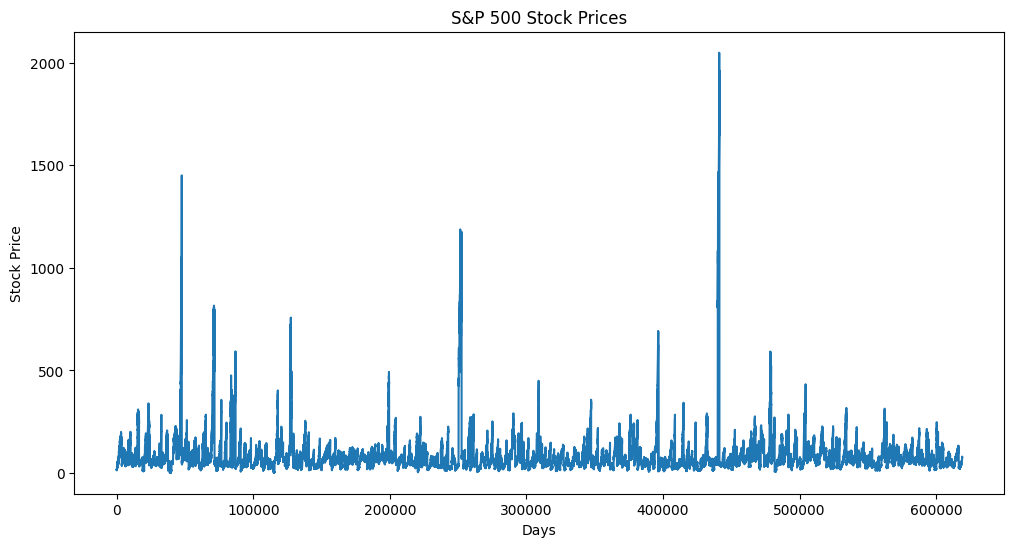

In [5]:
#Visualize the stock prices

plt.figure(figsize=(12, 6))
plt.plot(data['close'])
plt.title('S&P 500 Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

In [6]:
#Normalize the data

scaler= MinMaxScaler(feature_range=(0,1))
data['close']=scaler.fit_transform(np.array(data['close']).reshape(-1,1))

In [7]:
#Create sequences for training the RNN

sequence_length= 10 #Adjust this based on your preference
sequences= []
target= []

In [8]:
for i in range(len(data)-sequence_length):
    sequences.append(data['close'].iloc[i:i+sequence_length].values)
    target.append(data['close'].iloc[i+sequence_length])

In [9]:
#Convert lists to numpy arrays
sequences= np.array(sequences)
target= np.array(target)

In [10]:
#Split the data into training and testing sets
x_train,x_test,y_train,y_test= train_test_split( sequences, target, test_size=0.2, random_state= 42)

In [14]:
#Build the RNN model
model=Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Reshape input data to fit the model
x_train= np.reshape(x_train, (x_train.shape[0], sequence_length, 1))
x_test= np.reshape(x_test, (x_test.shape[0], sequence_length, 1))

In [15]:
#Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
13929/13929 [==============================] - 45s 3ms/step - loss: 9.7488e-06 - val_loss: 2.9185e-06
Epoch 2/20
13929/13929 [==============================] - 44s 3ms/step - loss: 6.0129e-06 - val_loss: 2.4897e-06
Epoch 3/20
13929/13929 [==============================] - 45s 3ms/step - loss: 5.7034e-06 - val_loss: 5.4259e-06
Epoch 4/20
13929/13929 [==============================] - 45s 3ms/step - loss: 5.8802e-06 - val_loss: 2.0348e-06
Epoch 5/20
13929/13929 [==============================] - 45s 3ms/step - loss: 5.8131e-06 - val_loss: 1.8964e-06
Epoch 6/20
13929/13929 [==============================] - 44s 3ms/step - loss: 5.7228e-06 - val_loss: 1.9244e-06
Epoch 7/20
13929/13929 [==============================] - 44s 3ms/step - loss: 5.5693e-06 - val_loss: 2.0078e-06
Epoch 8/20
13929/13929 [==============================] - 45s 3ms/step - loss: 5.5478e-06 - val_loss: 1.9395e-06
Epoch 9/20
13929/13929 [==============================] - 46s 3ms/step - loss: 5.5557e-06 - val_

In [16]:
#Evaluate the model

loss= model.evaluate(x_test, y_test)
print(f' Mean Squared Error on Test Data: {loss}')

3869/3869 [==============================] - 8s 2ms/step - loss: 9.8414e-06
 Mean Squared Error on Test Data: 9.84136659099022e-06


In [17]:
#Make predictions
predictions= model.predict(x_test)

3869/3869 [==============================] - 8s 2ms/step


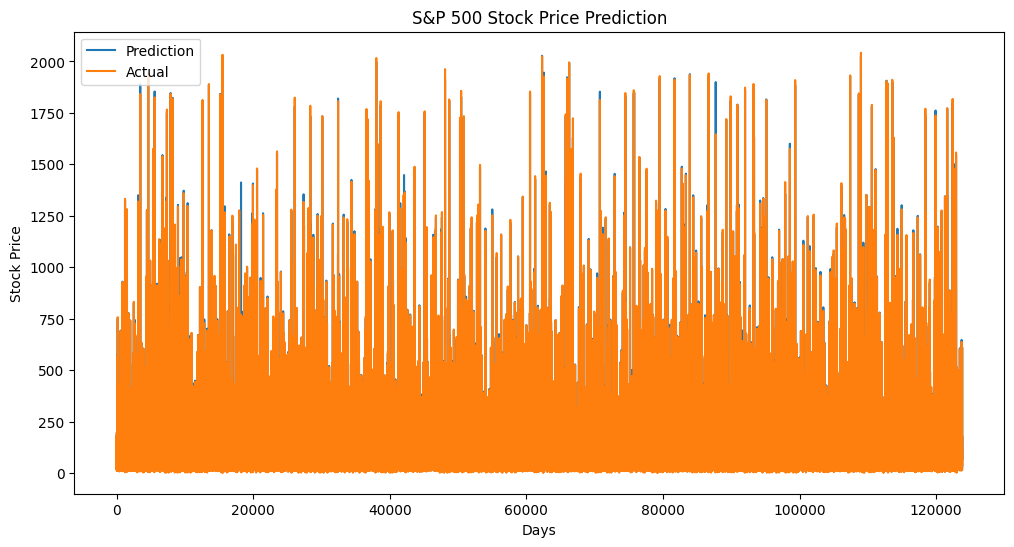

In [18]:
#Plot predictions against actual values

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(predictions), label= 'Prediction')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.title('S&P 500 Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()